In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *   
from io import StringIO
import pandas as pd

### Customized from read_SBDART_ex_1.py

    Function to read in select output from SBDART
    Requires:
    import numpy as np
    from pylab import *
    
    Input:
    filename = file location as string
           
    WL,FFV,TOPDN,TOPUP,TOPDIR,BOTDN,BOTUP,BOTDIR
    
    WL    = wavelength                         (microns)
    FFV   = filter function value
    TOPDN = total downward flux at ZOUT(2) km  (w/m2/micron)
    TOPUP = total upward flux at ZOUT(2) km    (w/m2/micron)
    TOPDIR= direct downward flux at ZOUT(2) km (w/m2/micron)
    BOTDN = total downward flux at ZOUT(1) km  (w/m2/micron)
    BOTUP = total upward flux at  ZOUT(1) km   (w/m2/micron)
    BOTDIR= direct downward flux at ZOUT(1) km (w/m2/micron)

In [2]:
filename = 'sbchk_simple'

In [3]:
f = loadtxt(filename,delimiter="\t",skiprows=5,dtype='str')
print(f.shape)

(276,)


In [4]:
WL=[] #--- wavelength (um)
FFV=[] #--- filter value (unit in this example)
TOPDN=[] #--- downwelling flux to the top of the atmosphere (TOA, W/cm2/um)
TOPUP=[] #--- TOA upwelling flux
TOPDIR=[] #--- TOA direct flux
BOTDN=[] #--- downwelling flux at surface
BOTUP=[] #--- upwelling flux at surface
BOTDIR=[] #--- direct flux at surface

In [5]:
for row in f:
    
        # c = str(row).replace('   ',' ')
        # c = c.replace('  ',' ')
        # c = c.replace('  ',' ')
        # c = c.split(' ')
    row = row[2:]
    row = row.replace('  ',' ')
    split_row = row.split(' ')

    WL.append(float(split_row[0]))
    FFV.append(float(split_row[1]))
    TOPDN.append(float(split_row[2]))
    TOPUP.append(float(split_row[3]))
    TOPDIR.append(float(split_row[4]))
    BOTDN.append(float(split_row[5]))
    BOTUP.append(float(split_row[6]))
    BOTDIR.append(float(split_row[7]))

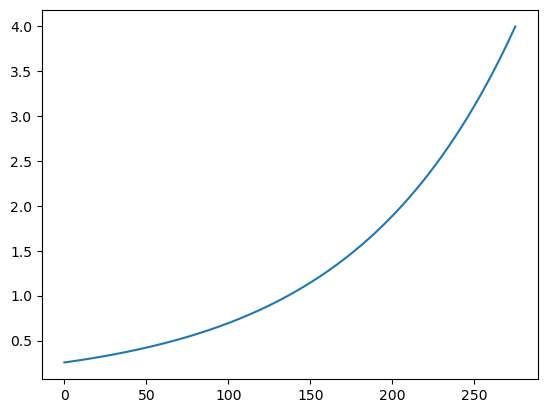

In [6]:
plt.plot(WL)
plt.show()

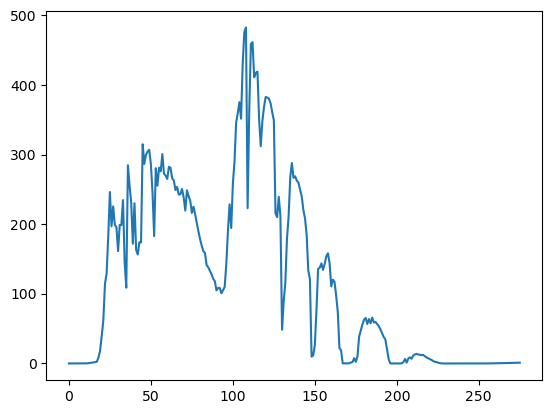

In [7]:
plt.plot(TOPUP)
plt.show()

To get weighting function for 3.9 um: 
* resource: https://geo.libretexts.org/Bookshelves/Meteorology_and_Climate_Science/Practical_Meteorology_(Stull)/08%3A_Satellites_and_Radar/8.00%3A_Radiative_Transfer_for_Satellites
* get a set of transmissivities (or optical thickness) for each height
* will input an atmospheric profile
* weighting function is simply $-\frac{d\text{ transmittance}}{dz}$

SBDART docs: https://github.com/paulricchiazzi/SBDART/blob/master/Documents/rtdoc.txt

In [8]:
with open('sbchk_profile', 'r') as file:
    data = file.read()

In [9]:
processed_data = data.replace('  ', ',')
processed_data = processed_data.replace('\n','')

In [10]:
data_io = StringIO(processed_data)

arr = np.loadtxt(data_io,
                 delimiter=",", dtype=str)

In [13]:
Z=[]
DDIR_F=[] #downward direct flux
DDIF_F=[] #downward diffuse flux
DOWN_F=[] #total downward flux
UP_F=[] #total upward flux

for i in range(len(arr)): 
    if 1 < i < 34:
        Z.append(float(arr[i]))
    if 34 < i < 67: 
        DDIR_F.append(float(arr[i]))
    if 67 < i < 100: 
        DDIF_F.append(float(arr[i]))
    if 100 < i < 133: 
        DOWN_F.append(float(arr[i]))
    if 133 < i < 166: 
        UP_F.append(float(arr[i]))

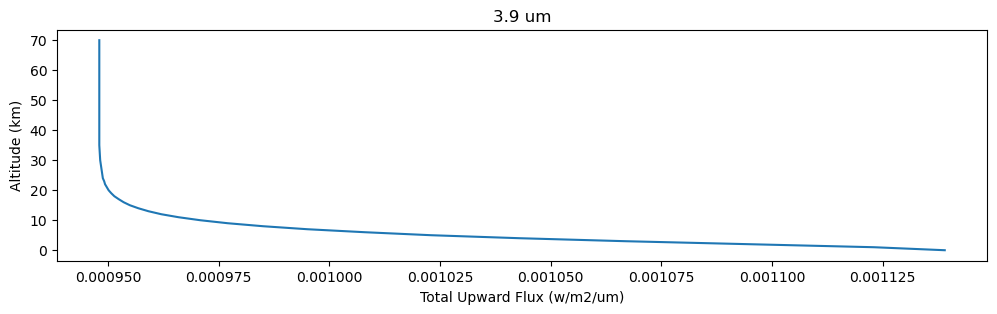

In [15]:
fig,ax=plt.subplots(1, figsize=(12,3))
ax.set_ylabel("Altitude (km)")
ax.set_xlabel("Total Upward Flux (w/m2/um)")
ax.set_title("3.9 um")

ax.plot(UP_F, Z)

plt.show()